<a href="https://colab.research.google.com/github/jmoralespineda/SENALES_Y_SISTEMAS/blob/main/PARCIAL_1/PARCIAL1_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO # 1
Se tiene un microprocesador de 5 bits con entrada analoga de
-3.3 a 5 [v]. Disene el sistema de acondicionamiento y digitalizacion para la señal:

 $$x(t) = 20 sin(7t−π/2)−3 cos(5t)+2 cos(10t).$$

 Presente las simulaciones y graficas de los procedimientos mas representativos en un cuaderno de Python, incluyendo al menos dos perıodos de la senal estudiada.

In [39]:
#PUNTO 1
# FUNCION CERO Y PENDIENTE
y_min = -3.3 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -3.3, ymax = 5): #  funcion cero y pendiente con valores definidos entre -3.3 a 5
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [40]:
# señal despues de cero y pendiente y discretización
from scipy.spatial.distance import cdist # da la distancia entre cada muestra y todos los cajones de cuantizacion
import numpy as np #uso de librerias scipy.spatial.distance y numpy

Fo = 1.59
To = 1/Fo
Fs = 10*Fo #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,5*To,Ts)#procesamiento de dos periodos discretizados
y = -20*np.cos(7*tv)-3*np.cos(5*tv)+2*np.cos(10*tv)

#cero y pendiente
ycs = my_ceropen(y, ymin=-3.3,ymax=5)

#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 5
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve


(50, 32)

In [41]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([ 1,  2,  5, 10, 16, 22, 27, 30, 30, 28, 23, 17, 10,  4,  1,  1,  4,
        9, 15, 21, 26, 28, 27, 24, 19, 14,  9,  5,  4,  5,  8, 12, 17, 21,
       25, 27, 27, 25, 21, 16, 10,  5,  1,  0,  2,  6, 13, 20, 26, 31])

In [42]:
print(ycs[1],ind[1],ve[ind[1]]) # # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

-2.747323148218153 2 -2.7645161290322577


In [43]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [44]:
for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

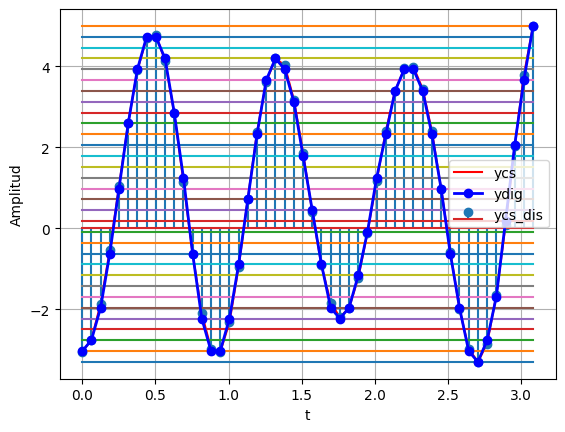

In [60]:
#graficar señales
import matplotlib.pyplot as plt

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# grafica señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='b',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

## EJERCICIO #2
Determinar cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo-digital (ADC) con una frecuencia de muestreo de 5 kHz, aplicado a la siguiente señal:


x(t)= 3cos(1000πt) + 5sin(2000πt) + 10cos(11000πt)
y analizar si el proceso de discretización es adecuado.

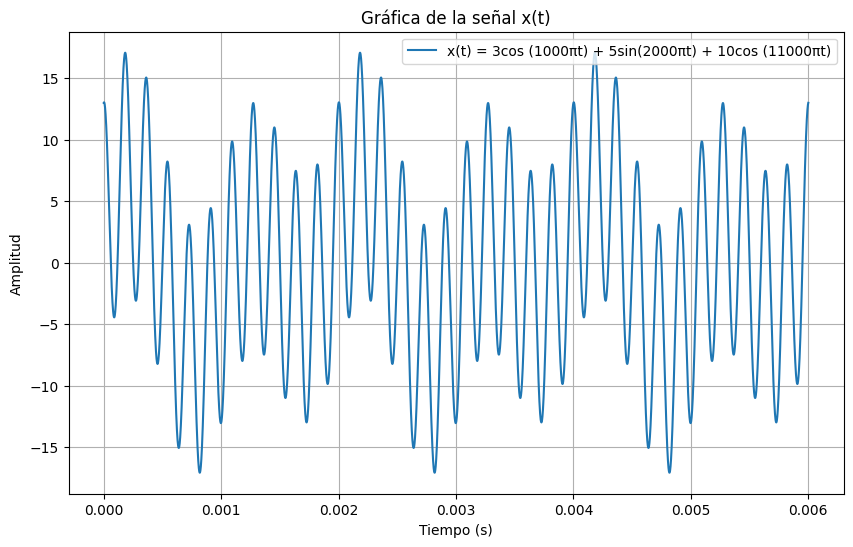

In [46]:
# PUNTO 2
import numpy as np
import matplotlib.pyplot as plt  # Uso de librerias numpy y matplotlib.pyplot
from scipy.signal import convolve  # Importa la función de convolución desde scipy.signal
from scipy.spatial.distance import cdist  # Importa la función para calcular distancias entre conjuntos de puntos

# Se define el eje del tiempo desde 0 hasta 6 milisegundos (0.006 s) con 10000 muestras.
# Esto da una alta resolución temporal para representar la señal con precisión.
t = np.linspace(0, 0.006, 10000)

# Se define la señal x(t) como la suma de tres componentes: una cosenoidal de 500 Hz,
# una senoidal de 1000 Hz y otra cosenoidal de 5500 Hz (frecuencias deducidas de los coeficientes del argumento).
# x(t) = 3*cos(1000πt) + 5*sin(2000πt) + 10*cos(11000πt)
x_t = 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Se crea una nueva figura para graficar, con tamaño de 10x6
plt.figure(figsize=(10, 6))

# Se grafica la señal x(t) en función del tiempo t, con una etiqueta para la leyenda
plt.plot(t, x_t, label='x(t) = 3cos (1000πt) + 5sin(2000πt) + 10cos (11000πt)')
plt.title('Gráfica de la señal x(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
# Se activa una cuadrícula para facilitar la lectura de la gráfica
plt.grid(True)
plt.show()


In [47]:
#Creacion de una funcion para muestriar y graficar la señal
def muestrear_graficar(Fs, duracion=0.006, titulo= ""):
  """
  Muestra y grafica la señal x_t,utilizando la frecuancia de muestreo  de 5kHz
  Fs= Frecuancia de muestreo en Hz
  duracion= duracion de la señal en segundos
  titulo= titulo de la grafica
  """
  T=1/Fs #Vector de muestreo
  t=np.arange(0,duracion,T) #Vector de tiempo
  #Señal
  x_t=3*np.cos(1000*np.pi*t)+5*np.sin(2000*np.pi*t)+10*np.cos(11000*np.pi*t)

  #Grafica de la señal muestreada
  plt.figure(figsize=(10, 6))
  plt.stem(t, x_t, linefmt='b-', markerfmt='ro', basefmt='k-')
  plt.title(titulo)
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Amplitud')
  plt.grid(True)
  plt.show()


##Muestreo y grafica de la señal de 5kHz

Se llama a la funcion  muestrear_y_graficar con una frecuencia de 5000 Hz para obtener la señal discretizada y mostar su grafica correspindiente.

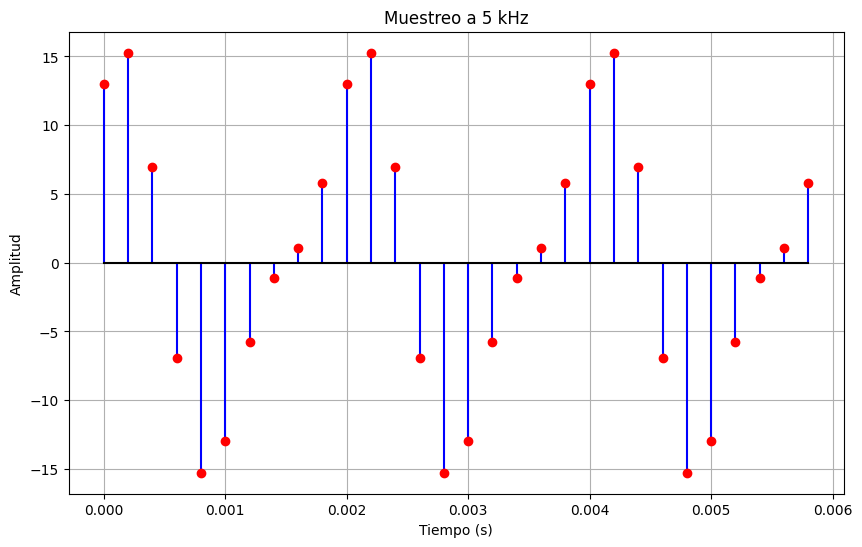

In [48]:
muestrear_graficar(5000, titulo="Muestreo a 5 kHz")

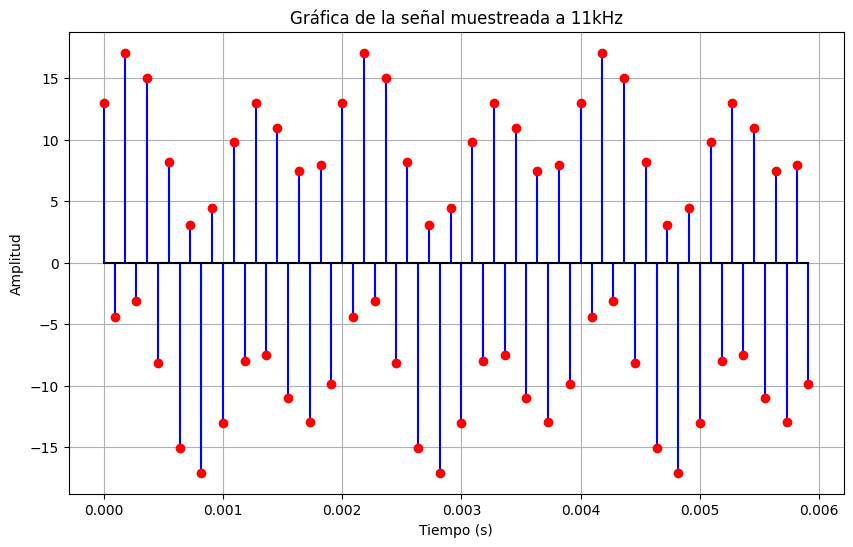

In [49]:
muestrear_graficar(11000, titulo="Gráfica de la señal muestreada a 11kHz")

## EJERCICIO #3
La distancia media entre dos senales:

 $$x_1(t), x_2(t) ∈ R, C$$

se puede expresar a partir de la potencia media:
$$(x_1, x2) = P¯x_1−x_2 = \frac{lım}{T→∞} \frac{1}{T} ∫_T
|x1(t) − x2(t)|^2dt.$$

Sean x1(t) y x2(t):
$$ x1(t) = A cos(w0t), w0 =2πT, T, A ∈ R^+ $$


$$
x2(t) =  (1  si  0 ≤ t < T/4)
  (−1 si T/4 ≤ t < 3T/4)
  (1 si 3T/4 ≤ t < T )
$$

¿Cual es la distancia media entre las señales?. Corrobore sus
desarrollos con Sympy.

In [50]:
# PUNTO 3
import sympy as sp

# Definición de variables simbólicas
t, T = sp.symbols('t T', real=True, positive=True)
w0 = 2 * sp.pi / T
A = sp.symbols('A', real=True, positive=True)
# Definición de las señales
x1 = A*sp.cos(w0 * t)
# Definición por partes de x2
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Definición de la función a integrar (diferencia al cuadrado)
f = (x1 - x2)**2

# Cálculo de la integral en cada tramo y suma total
integral = sp.integrate(f, (t, 0, T/4)) + sp.integrate(f, (t, T/4, 3*T/4)) + sp.integrate(f, (t, 3*T/4, T))

# Normalización por el periodo
distancia_media = integral / T

# Simplificación del resultado
distancia_media_simplificada = sp.simplify(distancia_media)

distancia_media_simplificada

A**2/2 - 4*A/pi + 1

## EJERCICIO #4
texto = """
Sea x′′(t) la segunda derivada de la señal x(t), donde t ∈ [ti, tf].
Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

$c_n = \frac{1}{(t_i - t_f)n^2\omega_0^2} \int_{t_i}^{t_f} x''(t) e^{-jn\omega_0 t} \,dt \quad ;\; n \in \mathbb{Z}"$

¿Cómo se pueden calcular los coeficientes an y bn desde x′′(t) en la serie trigonométrica de Fourier?

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción
para n ∈ {0, ±1, ±2, ±3, ±4, ±5}, a partir de x′′(t) para la señal x(t) en la Figura 1.

Compruebe el espectro obtenido con la estimación a partir de x(t) y presente las respectivas simulaciones sobre Python.
"""


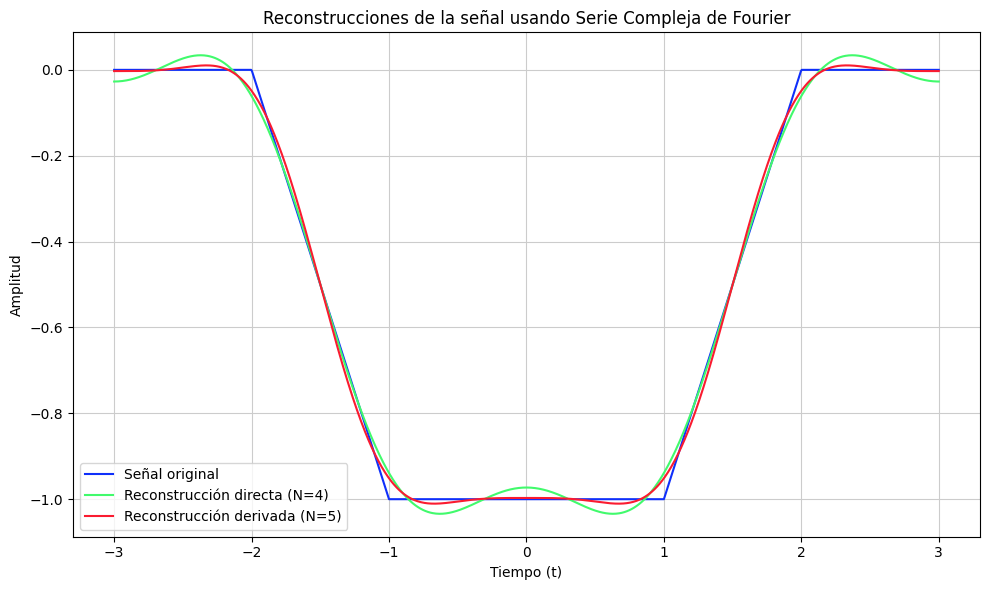

In [67]:
"""
Reconstrucción de una señal periódica mediante series de Fourier compleja.
Este script:
- Define una señal trapezoidal piecewise.
- Calcula sus coeficientes de Fourier por dos métodos:
   1) Directamente mediante la fórmula integral.
   2) Usando los coeficientes obtenidos a partir de la segunda derivada de la señal.
- Realiza la reconstrucción aproximada de la señal usando un número finito de términos.

"""

import numpy as np
import matplotlib.pyplot as plt

# === Parámetros del sistema ===
d1 = 1    # Inicio de la rampa ascendente (izquierda)
d2 = 2    # Fin de la rampa descendente (derecha)
A = 1     # Altura máxima de la señal
T = 6     # Período total de la señal

# === Dominio temporal ===
t = np.linspace(-T/2, T/2, 1000)  # Vector de tiempo centrado en cero

# === Definición de la señal piecewise trapezoidal ===
m2 = A / (d2 - d1)  # Pendiente de las rampas
m1 = -m2            # Pendiente negativa

x = np.piecewise(t,
                  [
                      ((t >= -T/2) & (t < -d2)),        # Zona izquierda (cero)
                      ((t >= -d2) & (t <= -d1)),        # Rampa ascendente
                      ((t > -d1) & (t <= d1)),          # Plataforma superior
                      ((t > d1) & (t <= d2)),           # Rampa descendente
                      ((t > d2) & (t <= T/2))           # Zona derecha (cero)
                  ],
                  [
                      0,                                # Valor constante
                      lambda t: m1 * t + d2 * m1,       # Ecuación de la rampa ascendente
                      -A,                                # Nivel alto
                      lambda t: m2 * t + d2 * m1,       # Ecuación de la rampa descendente
                      0                                 # Valor constante
                  ])

# Arreglos para almacenar los valores reconstruidos (aceptan números complejos)
re1 = np.zeros(1000, dtype=complex)  # Reconstrucción directa
re2 = np.zeros(1000, dtype=complex)  # Reconstrucción con derivada
re3 = np.zeros(1000, dtype=complex)  # Otra reconstrucción con derivada

# === Función de reconstrucción directa ===
def recos1(ti, N, T):
    """
    Reconstruye la señal usando la serie compleja de Fourier hasta el orden N.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T  # Frecuencia angular fundamental
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn multiplicado por exponencial compleja
            integrando = x * np.exp(-1j * i * omega * t)
            cn = (2 / T) * np.trapezoid(integrando, t)
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0)
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# === Función de reconstrucción usando la segunda derivada ===
def recos2(ti, N, T, d1, d2, A):
    """
    Reconstruye la señal usando coeficientes calculados a partir de la segunda derivada.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal
    d1, d2 (float): Límites de las rampas
    A (float): Altura máxima de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn usando derivada
            numerador = 4 * (A / (d2 - d1)) * (np.cos(d1 * i * omega) - np.cos(d2 * i * omega))
            denominador = T * i**2 * omega**2
            cn = numerador / denominador
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0), igual que antes
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# === Reconstrucción punto a punto ===
for i in range(1000):
    re1[i] = recos1(t[i], 4, T)  # Reconstrucción con 5 términos (0 a 4)
for i in range(1000):
    re2[i] = recos2(t[i], 5, T, d1, d2, -A)  # Reconstrucción con 6 términos (0 a 5)
# for i in range(1000):
#     re3[i] = recos2(t[i], 1, T, d1, d2, -A)  # Reconstrucción con 2 términos (0 a 1)

# === Gráfica de resultados ===
plt.figure(figsize=(10, 6))
plt.plot(t, x, color=(0.0588, 0.1843, 0.9804), label='Señal original')
plt.plot(t, re1.real, color=(0.2549, 0.9804, 0.4235), label='Reconstrucción directa (N=4)')
plt.plot(t, re2.real, color=(0.9804, 0.1059, 0.1882), label='Reconstrucción derivada (N=5)')
#plt.plot(t, re3.real, color=(0,0,0), label='Reconstrucción derivada (N=1)')
plt.title('Reconstrucciones de la señal usando Serie Compleja de Fourier')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(color=(0.8, 0.8, 0.8))
plt.tight_layout()
plt.show()

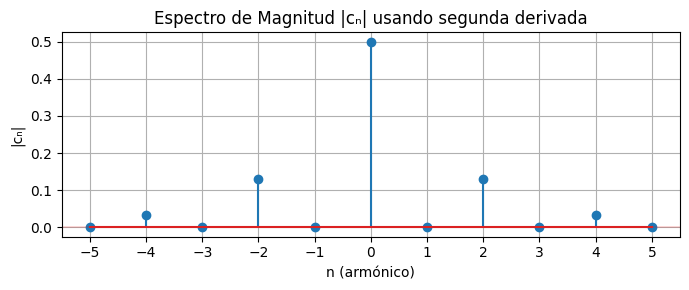

In [68]:
#Cálculo del espectro:

# === Calcular término constante c₀ ===
c0 = (1 / T) * np.trapezoid(x, t)

N_max = 5   # Número máximo de armónicos a graficar
# === Vector de armónicos n ∈ [-N_max, ..., 0, ..., N_max] ===
nv = np.arange(-N_max, N_max + 1)

# === Frecuencia angular fundamental ===
omega0 = (2 * np.pi) / T

# === Calcular coeficientes de Fourier usando segunda derivada ===
Cn = np.zeros_like(nv, dtype=np.complex128)

non_zero_mask = nv != 0  # Evitar división por cero
Cn[non_zero_mask] = (2j / (T * nv[non_zero_mask]**2 * omega0**2)) * \
                    (np.sin(nv[non_zero_mask] * omega0 * d1) - np.sin(nv[non_zero_mask] * omega0 * d2))

# Asignar valor medio en n=0
Cn[nv == 0] = c0

# Gráfica del espectro
plt.figure(figsize=(7, 3))
plt.stem(nv, np.abs(Cn))
plt.title("Espectro de Magnitud |cₙ| usando segunda derivada")
plt.xlabel("n (armónico)")
plt.ylabel("|cₙ|")
plt.grid(True)
plt.axhline(0, color='red', linewidth=0.2)
plt.xticks(nv)
plt.tight_layout()
plt.show()

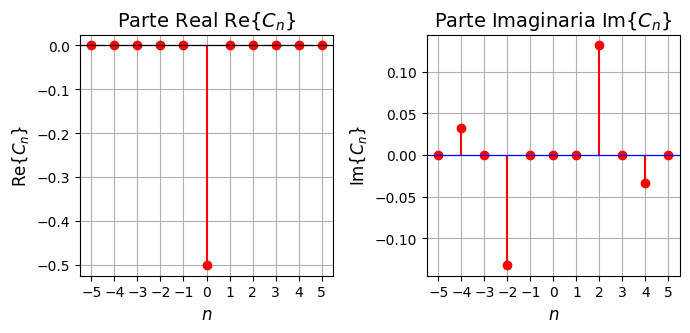

In [66]:
#graficar espectro

# Gráfico del espectro en formato de matriz 2x2
fig = plt.figure(figsize=(7, 6))

# === Fila 1: Parte real e imaginaria ===

# Grafica de la parte real
ax1 = fig.add_subplot(2, 2, 1)
ax1.stem(nv, np.real(Cn), 'r', basefmt=" ")
ax1.set_title(r'Parte Real $\text{Re}\{C_n\}$', fontsize=14)
ax1.set_xlabel(r'$n$', fontsize=12)
ax1.set_ylabel(r'$\text{Re}\{C_n\}$', fontsize=12)
ax1.grid(True)
ax1.axhline(0, color='black', lw=0.9)
ax1.set_xticks(nv)

# Grafica de la parte imaginaria
ax2 = fig.add_subplot(2, 2, 2)
ax2.stem(nv, np.imag(Cn), 'r', basefmt=" ")
ax2.set_title(r'Parte Imaginaria $\text{Im}\{C_n\}$', fontsize=14)
ax2.set_xlabel(r'$n$', fontsize=12)
ax2.set_ylabel(r'$\text{Im}\{C_n\}$', fontsize=12)
ax2.grid(True)
ax2.axhline(0, color='blue', lw=0.9)
ax2.set_xticks(nv)

# Ajustar espaciado entre subplots
fig.tight_layout()
plt.show()